<a href="https://colab.research.google.com/github/ms624atyale/Data_Analysis/blob/main/12_Unpaired_Paired_2Sample_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💦🔥 Parametric vs. Non-Parametric Tests 모수 대 비모수 통계 ⤵️

# 💦🔥 <font color = 'red'>**1️⃣ Unpaired Comparisons</font> with independent samples** ⤵️
- **<font color = 'brown'>Unpaired Student's t-test</font>** which satisfy normaility
- **<font color = 'brown'>Mann Whitney U test</font>** which _fails to_ satisfy normaility

## 1️⃣-1️⃣ **Unpaired student's t-test**

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data from the CSV file
data = pd.read_csv('/content/sample_data/TwoGroupData_Base4Ttest_Independent.csv')

# Filter operation on the DataFrame data to accesses the 'Group' column of the DataFrame, include only rows for Group 1
#then extract the 'Values' column from those rows exclusively
group1 = data[data['Group'] == 1]['Values']
# The same applies to rows for Group 2 and their associated values.
group2 = data[data['Group'] == 2]['Values']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("Ho: There is no difference in academic achievements between hispanic and african-american in California.")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Interpretation: Data between the two groups are NOT equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))")

Ho: There is no difference in academic achievements between hispanic and african-american in California.
t-statistic: 1.7938960492256657
p-value: 0.07913000786288246
Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))


#### Before we proceed further...

# 🚥 ⤵️ **U statistic**

<Data>
Group 1: [10, 20, 30, 40, 50]
Group 2: [11, 22, 33, 44, 55]

Step 1: Combine samples.
    
    Combined samples (sorted): [10, 11, 20, 22, 30, 33, 40, 44, 50, 55]

Step 2: Assign ranks to each value.

    10 gets rank 1
    11 gets rank 2
    20 gets rank 3
    22 gets rank 4
    30 gets rank 5
    33 gets rank 6
    40 gets rank 7
    44 gets rank 8
    50 gets rank 9
    55 gets rank 10

Step 4: Calculate the U statistic. Since we're comparing group 1 to group 2, let's focus on group 1's ranks:

  - For each value in group 1, count how many values in group 2 it exceeds.
  - Sum these counts to get the U statistic.

For group 1:

    10 exceeds 0 values in group 2.
    20 exceeds 1 value in group 2.
    30 exceeds 2 values in group 2.
    40 exceeds 3 values in group 2.
    50 exceeds 4 values in group 2.
    
    Summing these counts: 0 + 1 + 2 + 3 + 4 = 10
    So, the U statistic for group 1 is 10.



The degree of separation between the two groups in terms of U statistic represents how well the ranks of group 1 are separated from the ranks of group 2. In this case, the U statistic of 10 indicates that group 1 tends to have higher ranks compared to group 2, suggesting a higher distribution or larger values in group 1.

## 1️⃣-2️⃣ **Mann-Whitney U test**

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('/content/sample_data/TwoGroupData_Base4MannWhitneyUtest_Independent.csv')

# 'group1' and 'group2' are the columns containing the two groups of data
# Extract the measurements for each group
group1 = data[data['Group'] == 1]['Values']
group2 = data[data['Group'] == 2]['Values']

# Using the mannwhitneyu function from the scipy.stats module,
#it takes two groups of data (group1 and group2) as input and
#performs a two-sided test (i.e., tests whether the distributions of the two groups are different).
U_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Calculate mean and standard deviation for U
n1 = len(group1) #len() calculates the number of observations in group1
n2 = len(group2)
# Calculate the mean of the U statistic under the null hypothesis of no difference between the two groups.
#It's calculated as the product of the sample sizes divided by 2.
mu_U = n1 * n2 / 2
# Calculates the standard deviation of the U statistic under the null hypothesis.
#It's calculated using the formula for the standard deviation of the sum of ranks(순위합계) in the Mann-Whitney U test.
sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12) #constant 12 for the denominator

# Calculate z-score
# measures the number of standard deviations away from the mean that the observed U statistic is.
#It's calculated as the difference between the observed U statistic and
#the expected mean U statistic under the null hypothesis, divided by the standard deviation of U.
z = (U_statistic - mu_U) / sigma_U

# Print the results
print ("Ho: There is no difference in academic achievements between hispanic and african-american in California.")
print("Mann-Whitney U:", U_statistic)
print("p-value:", p_value)
print("z-score:", z)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Interpretation: Data between the two groups are NOT equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))")

Ho: There is no difference in academic achievements between hispanic and african-american in California.
Mann-Whitney U: 381.0
p-value: 0.18703749337591546
z-score: 1.3290952251991046
Interpretation: Data between the two groups are equal. (Fail to reject Ho (p>0.05*))


#<font color = 'red'>**2️⃣ Pair-wise comparisons</font>** when samples are related (e.g., two measurements from the same group of participants).
- **<font color = 'brown'>Paired samples t-test**</font> which satisfies normality
- **<font color = 'brown'>Wilcoxon Signed Rank test**</font>(윌콕슨부호순위검정) which _fails to_ satisfy normality


#🚥 ⤵️ <font color = 'purple'> **f-string** (formatted string literal) in Python
    Conciseness: They provide a shorter syntax compared to other **string formatting methods like % formatting** or the **str.format() method**.

- **f-strings** allow you <font color = 'red'>_to embed expressions inside a string_</font> by prefixing the string with the letter f or F (e.g., f{}).
- **f{t_statistic}**: Inside the f-string, this is a **_placeholder_** for the variable t_statistic. The value of t_statistic(t 통계값) will be converted to a string and inserted into the larger string at this position.
- **f{p_value_ttest}**: This is a **_placeholder_** for the variable p_value_ttest. Its value will be evaluated and inserted into the string.


   Before_t  After_t
0        85       87
1        86       89
2        88       91
3        75       80
4        78       80
5        94       95
6        90       92
7        83       85
8        88       89
9        77       79


Ho: Students' achievements before and after the online tutorial are equal.
Paired t-test results:

 t-statistic: -6.272727272727272

 p-value: 0.00014563278012850932
Interpretation: Students' achievements before and after the online tutorial are NOT equal. (Reject Ho (p<0.05*))




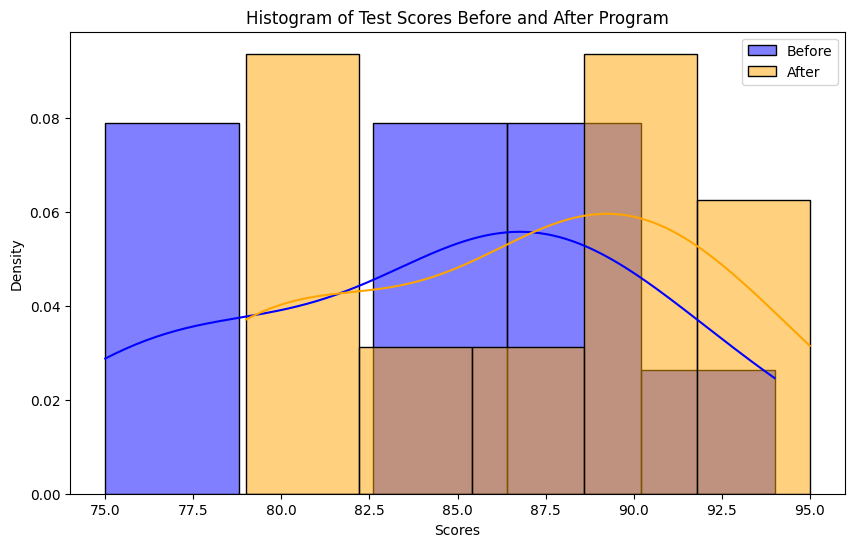

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon #Paired comparisons of one group with related samples (cf., Independent samples from different groups)
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: test scores of students before and after the program
group1 = np.array([85, 86, 88, 75, 78, 94, 90, 83, 88, 77])
group2 = np.array([87, 89, 91, 80, 80, 95, 92, 85, 89, 79])

# Convert the data to a pandas DataFrame 🚩 making a dictionary {key:value}
data = pd.DataFrame({
    'Before_t': group1,
    'After_t': group2
})

print (data)
print ('\n')

# Perform a paired t-test
t_statistic, p_value_ttest = ttest_rel(data['Before_t'], data['After_t'])

# Print the results of the paired t-test using f-strings ⤴️
print ("Ho: Students' achievements before and after the online tutorial are equal.")
print("Paired t-test results:")
print("\n", f"t-statistic: {t_statistic}") # f-string (formatted string literal) in Python.
print("\n", f"p-value: {p_value_ttest}")

# Interpret the results of the paired t-test
alpha = 0.05 #Critical test threshold
if p_value_ttest < alpha:
    print("Interpretation: Students' achievements before and after the online tutorial are NOT equal. (Reject Ho (p<0.05*))")
else:
    print("Interpretation: Students' achievements before and after the online tutorial are equal (Fail to reject Ho (p>0.05*))")

print("\n")

# Plot the before and after score
plt.figure(figsize=(10, 6))
sns.histplot(data['Before_t'], kde=True, color='blue', label='Before', stat='density')
sns.histplot(data['After_t'], kde=True, color='orange', label='After', stat='density')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Histogram of Test Scores Before and After Program')
plt.legend()
plt.show()

    Before_w  After_w
0         10       15
1         12       20
2         11       18
3         14       25
4         13       22
5         16       17
6          9       19
7          8       21
8          7       23
9         15       24
10        18       27
11        19       30
12        17       29
13        20       28
14        22       26



 Wilcoxon signed-rank test results:

 z-score (for non-parametiric Wilcoxon statistic): 0.0

 Test statistic: 0.0

 p-value: 6.103515625e-05

 Interpretation: Students' academic achievements differ between pre-tutorial and post-tutorial scores. (Reject the null hypothesis (p<0.05*))




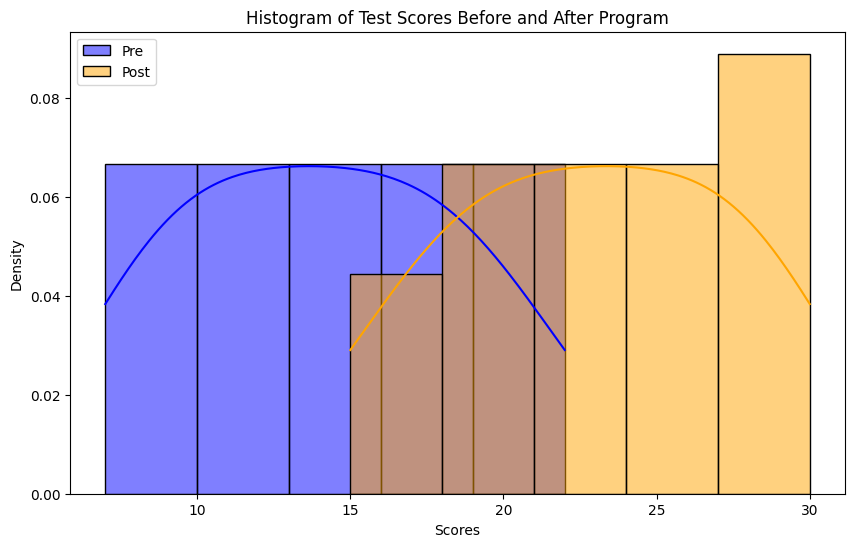

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon #Paired comparisons of one group with related samples (cf., Independent samples from different groups)
import matplotlib.pyplot as plt
import seaborn as sns

group3 = np.array([10, 12, 11, 14, 13, 16, 9, 8, 7, 15, 18, 19, 17, 20, 22])
group4 = np.array([15, 20, 18, 25, 22, 17, 19, 21, 23, 24, 27, 30, 29, 28, 26])

# Convert the data to a pandas DataFrame 🚩 making a dictionary {key:value}
data = pd.DataFrame({
    'Before_w': group3,
    'After_w': group4
})

print (data)
print ('\n')

# Perform Wilcoxon signed-rank test as a non-parametric alternative
w_statistic, p_value_wilcoxon = wilcoxon(data['Before_w'], data['After_w'])

# Calculate z-score (Wilcoxon signed-rank test already includes z-score in output)
z_score_wilcoxon = w_statistic  # The w_statistic is effectively the z-score for Wilcoxon test

# Print the results of the Wilcoxon signed-rank test using f-strings
print("\n", "Wilcoxon signed-rank test results:")
print("\n", f"z-score (for non-parametiric Wilcoxon statistic): {w_statistic}")
print("\n", f"Test statistic: {w_statistic}")
print("\n", f"p-value: {p_value_wilcoxon}")

# CTT(Critical test threshold)
alpha = 0.05

# Interpret the results of the Wilcoxon signed-rank test
if p_value_wilcoxon < alpha:
    print("\n", "Interpretation: Students' academic achievements differ between pre-tutorial and post-tutorial scores. (Reject the null hypothesis (p<0.05*))")
else:
    print("\n", "Students' academic achievements are similar between pre-tutorial and post-tutorial scores. (Fail to reject the null hypothesis (p>0.05*))")

print("\n")

# Plot the before and after scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Before_w'], kde=True, color='blue', label='Pre', stat='density')
sns.histplot(data['After_w'], kde=True, color='orange', label='Post', stat='density')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Histogram of Test Scores Before and After Program')
plt.legend()
plt.show()